### BU Sustainability: How weather impacts Waste
#### Answer a series of questions through data analysis to help BU sustainability implement the Zero Waste plan: 
1. Does temperature impact waste generation? 
2. If so, in what ways (i.e. more recycling, more of all materials, less recycling, etc.). 
3. Can we use temperature as a predictor of waste generation and service level requirements? 

### Preliminary Data Analysis
- Understand and explore data/distribution of various datasets provided
- Work towards answering the main questions of the project

In [1]:
#Imports
import numpy as np
import pandas as pd
import random, glob, time
import matplotlib.pyplot as plt

DATA_PATH = 'data/'

In [2]:
csv_files = glob.glob(DATA_PATH+"*.csv")
csv_files

['data/readings_device.39671_from.2022-07-01_to.2022-10-02.csv',
 'data/Hauler_Response_Pick-Up_2023-01-04_1018.csv',
 'data/readings_device.39686_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39686_from.2021-07-16_to.2021-10-02.csv',
 'data/readings_device.24668_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39671_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39667_from.2021-07-01_to.2021-10-02.csv',
 'data/readings_device.39686_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39874_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39691_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39667_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39874_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39569_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39689_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.24572_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39665_from.202

In [39]:
xl_files = glob.glob(DATA_PATH+"*.xl*")
xl_files

['data/File Overview.xlsx', 'data/BU Daily Weights FY22.xlsx']

In [ ]:
'data/Alert_Flag_History_2023-01-04_1029.csv'
'data/PSI_Readings_with_Weather_2023-01-04_1026.csv'
'data/BU Daily Weights FY22.xlsx'

In [4]:
reading_df = pd.read_csv(csv_files[3])
reading_df

,readingDtUtz,valuePsi,celsius,fahrenheit
0,2021-08-27T12:56:43,744,23.41,74.138
1,2021-08-27T12:57:14,672,23.41,74.138
2,2021-08-27T13:00:13,664,23.41,74.138
3,2021-08-27T13:00:44,632,23.41,74.138
4,2021-08-27T13:04:31,664,23.41,74.138
...,...,...,...,...
1735,2021-10-01T20:24:58,464,15.86,60.548
1736,2021-10-01T21:22:01,504,15.86,60.548
1737,2021-10-01T21:22:31,448,15.86,60.548
1738,2021-10-01T21:32:35,552,15.86,60.548


### Look at Alert Types

In [5]:
alert_flag_df = pd.read_csv('data/Alert_Flag_History_2023-01-04_1029.csv')
alert_flag_df

,Account,Site,Device,Serial No.,Alert Type,Beginning Date,End Date,Days Open
0,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Full Event Not Triggered,2021-08-25T12:29:06,2021-08-29T15:11:26,4
1,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Device Comm Error,2021-09-01T20:05:03,2021-09-01T20:09:28,0
2,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Full Event Not Triggered,2021-09-09T20:13:29,2021-09-29T19:23:02,19
3,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Device Comm Error,2021-10-02T15:21:02,2021-10-06T11:11:08,4
4,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,No PSI Readings,2021-10-05T04:18:01,2021-10-06T11:11:08,1
...,...,...,...,...,...,...,...,...
759,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,Full Event Not Triggered,2022-12-26T17:15:23,NaN,9
760,Boston University,BU #46 30 Bay State,BU #46 30 Bay State 20 Yd,31200,Full Event Not Triggered,2022-12-26T06:14:06,NaN,9
761,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,Full Event Not Triggered,2022-12-20T04:45:39,NaN,15
762,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,Full Event Not Triggered,2022-11-28T17:46:24,NaN,37


Text(0.5, 1.0, 'Number of Alerts for each alert type')

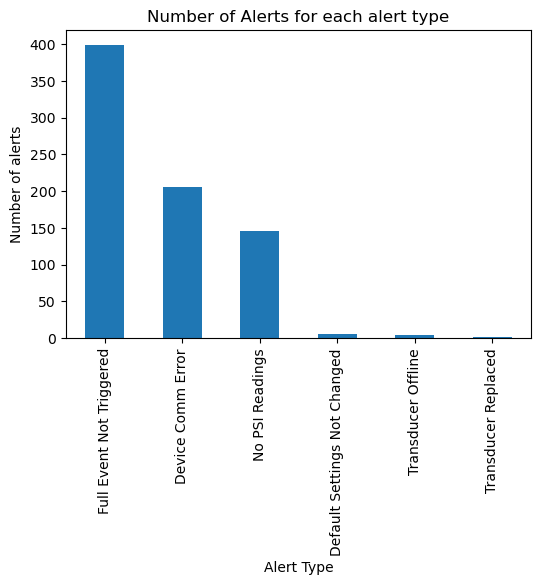

In [30]:
plt.figure(figsize=(6,4))
alert_flag_df['Alert Type'].value_counts().plot.bar()
plt.xlabel("Alert Type")
plt.ylabel("Number of alerts")
plt.title("Number of Alerts for each alert type")

### Investigate PSI Readings with Weather

In [6]:
psi_weather = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
psi_weather

,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit
0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,168,2023-01-04T04:22:06,1009.0,2.28,NaN,NaN
1,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,328,2023-01-04T04:21:53,1009.0,2.28,NaN,NaN
2,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,208,2023-01-04T04:21:23,1009.0,2.28,NaN,NaN
3,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,720,2023-01-04T04:00:41,1009.0,2.30,NaN,NaN
4,Boston University,BU #87 College of Engineering,BU #87 College of Engineering 20 Yd,31168,600,2023-01-04T03:01:46,1009.0,2.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,640,2022-04-30T23:02:40,1017.7,3.23,NaN,NaN
99996,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,664,2022-04-30T23:02:09,1017.7,3.23,NaN,NaN
99997,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,832,2022-04-30T22:58:25,1017.7,3.22,NaN,NaN
99998,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,808,2022-04-30T22:57:53,1017.7,3.22,NaN,NaN


In [37]:
psi_weather.columns

Index(['Account', 'Site', 'Device', 'Serial No.', 'Reading', 'Reading Date',
       'Pressure', 'Wind Speed', 'Celsius', 'Fahrenheit'],
      dtype='object')

In [47]:
psi_weather[['Device', 'Serial No.']].value_counts()

Device                                      Serial No.
BU #82 Warren Towers 35 Yd                  31180         13650
BU #93 George Sherman Union 35 Yd           31165          9690
BU #43 West Loading Dock                    31173          9241
BU #87 College of Engineering 20 Yd         31168          7990
BU #2 Student Village 35 Yd                 31178          6710
BU #38 Life Sciences 20 Yd                  31201          6158
BU #48 Student Village #2 20 Yd             30932          4955
BU #72 Rafik B Hariri 20 YD                 31176          4215
BU #18 - Warren Hall 20 Yd                  30946          4019
140 Bay State                               31170          3976
BU MED - 15 Stoughton 35 Yd                 31172          3594
BU #108 Agganis Arena 35 Yd                 30851          3303
BU #35 22 Babbit 35 Yd                      31183          2680
BU #46 30 Bay State 20 Yd                   31200          2415
BU #90 - School of Law 35                   31167

In [8]:
psi_weather.describe()

,Serial No.,Reading,Pressure,Wind Speed,Celsius,Fahrenheit
count,100000.000000,100000.000000,100000.000000,100000.000000,0.0,0.0
mean,31139.147730,654.145360,1017.560349,6.202509,NaN,NaN
std,95.493204,366.647102,7.616226,2.984145,NaN,NaN
min,30845.000000,104.000000,985.400000,0.050000,NaN,NaN
25%,31165.000000,384.000000,1012.300000,3.960000,NaN,NaN
50%,31173.000000,608.000000,1017.300000,5.690000,NaN,NaN
75%,31180.000000,856.000000,1023.100000,7.950000,NaN,NaN
max,31337.000000,2032.000000,1038.400000,24.380000,NaN,NaN


Text(0.5, 1.0, 'Atmospheric Pressure for each Device')

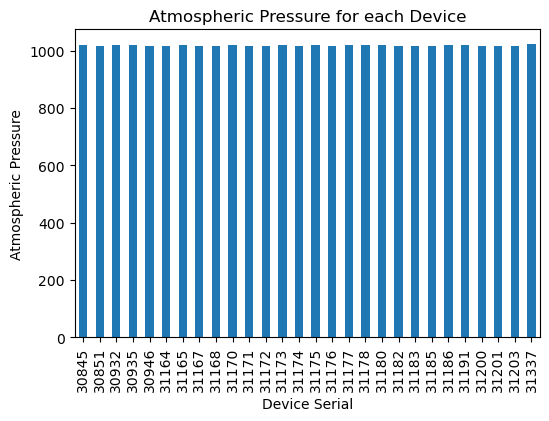

In [25]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Serial No.'])['Pressure'].mean().plot.bar()
plt.xlabel("Device Serial")
plt.ylabel("Atmospheric Pressure")
plt.title("Atmospheric Pressure for each Device")

Text(0.5, 1.0, 'Mean PSI Reading for each Device')

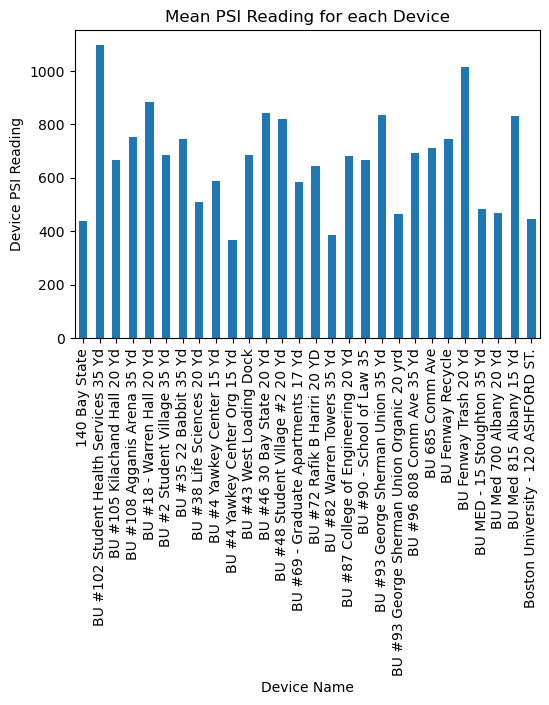

In [26]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Device'])['Reading'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Device PSI Reading")
plt.title("Mean PSI Reading for each Device")

Text(0.5, 1.0, 'Mean Wind Speed for each Device')

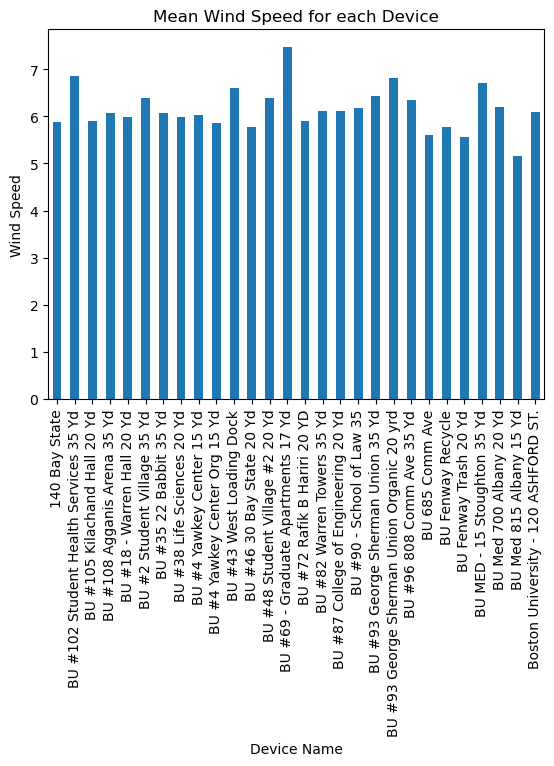

In [27]:
psi_weather.groupby(['Device'])['Wind Speed'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Wind Speed")
plt.title("Mean Wind Speed for each Device")

### Look at Device Compactions

In [31]:
deviceCompaction_df = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')
deviceCompaction_df

,Site,Total Compactions,12 AM - 6 AM,6 AM - 12 PM,12 PM - 6 PM,6 PM - 12 AM
0,BU #102 Student Health Services,2500,41,338,526,1595
1,BU #105 Kilachand Hall,1647,72,858,639,78
2,BU #108 Agganis Arena,6429,1541,1513,1364,2011
3,BU #18 - Warren Hall,8437,20,3043,3589,1785
4,BU #2 Student Village,13196,135,4130,5025,3906
5,BU #35 22 Babbit,5995,318,2005,1671,2001
6,BU #38 Life Sciences,13205,2047,2699,5065,3394
7,BU #4 Yawkey,5591,597,1331,2447,1216
8,BU #43 West Loading Dock,22844,742,9069,7266,5767
9,BU #46 30 Bay State,6216,387,1551,2579,1699


Text(0.5, 1.0, 'Compactions by Site')

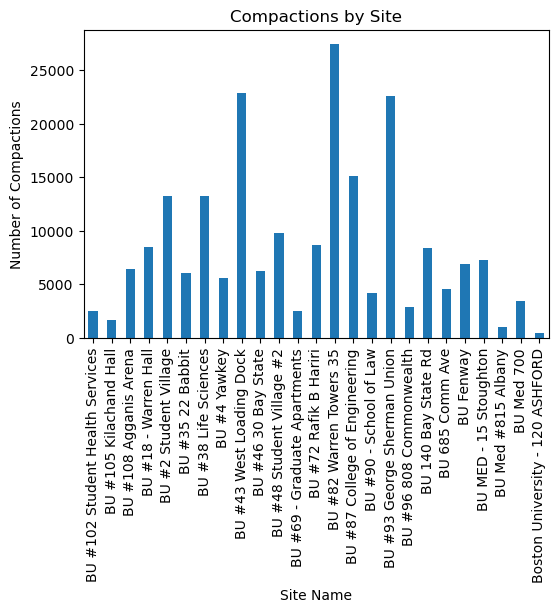

In [33]:
plt.figure(figsize=(6,4))
deviceCompaction_df.groupby(['Site'])['Total Compactions'].mean().plot.bar()
plt.xlabel("Site Name")
plt.ylabel("Number of Compactions")
plt.title("Compactions by Site")

### Look at Daily Weights

In [41]:
daily_weights_df = pd.read_excel('data/BU Daily Weights FY22.xlsx')
daily_weights_df

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582.0,200 Riverway,200 Riverway,2022-06-27,Trash,1.88
1,31582.0,200 Riverway,200 Riverway,2022-06-09,Trash,2.13
2,31582.0,200 Riverway,200 Riverway,2022-05-24,Trash,2.60
3,31582.0,200 Riverway,200 Riverway,2022-05-14,Trash,2.95
4,31582.0,200 Riverway,200 Riverway,2022-05-07,Trash,2.99
...,...,...,...,...,...,...
18169,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-10,Compost,5.52
18170,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-02,Compost,2.78
18171,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-08-26,Compost,1.90
18172,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-07-27,Compost,0.93


Text(0.5, 1.0, 'Mean Daily Weight by Waste Type')

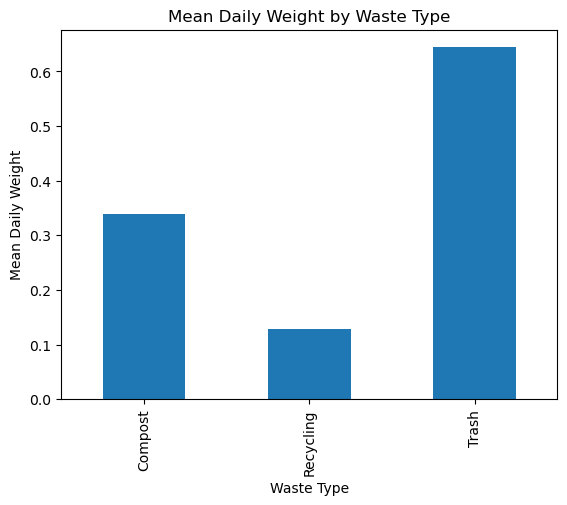

In [44]:
daily_weights_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type")

In [53]:
daily_weights_df['Location'].value_counts()[0:20]

BU #112 - 949 Comm Ave                   477
BU #4 - Yawkey Center                    433
BU #30 - Blanford                        425
BU #2 - Student Village                  398
BU #75 - College of Health               379
BU #33 - Music House                     328
BU MED- 815 Albany                       321
BU #44 - Walter Brown Arena              316
BU #103 - Center For English Language    313
BU #92 - Mugar Memorial Library          311
BU #3 - 10 Lenox                         304
BU #26 - 175 Bay State                   299
BU COMPOST- 275 Babcock                  298
BU #82 - Warren Towers                   297
BU #29 - Harriet Richards House          296
BU #25 - 159 Bay State                   289
BU #115 - 985 Comm Ave                   276
BU #19 - Core Curriculum                 263
BU #78 - 660 Beacon                      260
BU #27 - IT Help Center                  258
Name: Location, dtype: int64

In [54]:
warren_towers_df = daily_weights_df[daily_weights_df['Location'] == 'BU #82 - Warren Towers']
warren_towers_df

,Customer Key,Location,Address,Work Order Date,Material,Tons
9983,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-27,Trash,1.750000
9984,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-20,Trash,1.240000
9985,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-13,Trash,2.110000
9986,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-06-06,Trash,2.520000
9987,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2022-05-31,Trash,2.070000
...,...,...,...,...,...,...
17995,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2023-06-21,Compost,0.065140
17996,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2023-06-22,Compost,0.051650
17997,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2023-06-24,Compost,0.118620
17998,31911.0,BU #82 - Warren Towers,700 COMMONWEALTH AVE,2023-06-27,Compost,0.055775


Text(0.5, 1.0, 'Mean Daily Weight by Waste Type at Warren Towers')

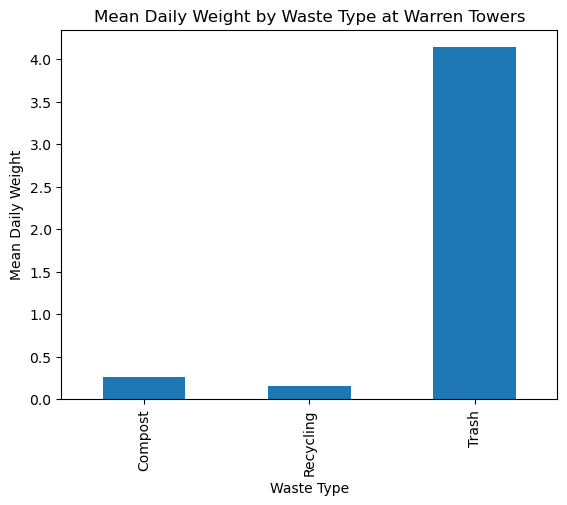

In [56]:
warren_towers_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type at Warren Towers")